In [1]:
import json
import numpy as np
import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
%matplotlib inline

In [460]:
def make_graph(filedir, exp_name, title):
    filename = filedir + "/" + exp_name + "/" + exp_name + "_values.log"

    with open(filename, 'r') as f:
        data = json.load(f)

    test_accuracy = np.array(data['test_accuracy'])[:,1]
    val_accuracy = np.array(data['val_accuracy_per_epoch'])[:, 1]

    plt.title(title + " Accuracy", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(val_accuracy, 'g-', linewidth=1.5)
    plt.plot(test_accuracy, 'r-', linewidth=1.5)
    plt.legend(["Validation Accuracy", "Test Accuracy"])
    plt.grid(linestyle='dotted')
    plt.savefig("../visualizations/" + exp_name + "_accuracy.svg")
    plt.show()

    plt.clf()
    train_loss = np.array(data['train_loss_per_epoch'])[:, 1]
    val_loss = np.array(data['val_loss_per_epoch'])[:, 1]

    plt.title(title + " Loss", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(train_loss, '-', linewidth=1.5, color="#4363d8")
    plt.plot(val_loss, 'g-', linewidth=1.5)
    plt.legend(["Train Loss", "Validation Loss"])
    plt.grid(linestyle='dotted')
    plt.savefig("../visualizations/" + exp_name + "_loss.svg")
    plt.show()

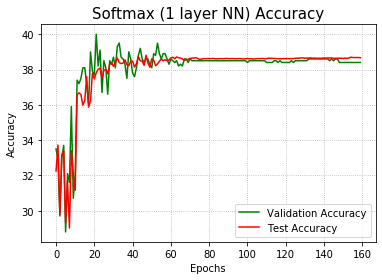

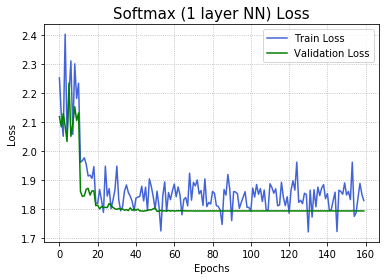

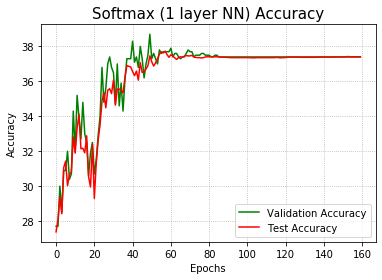

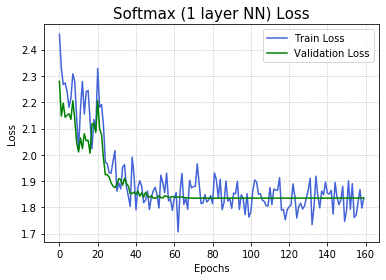

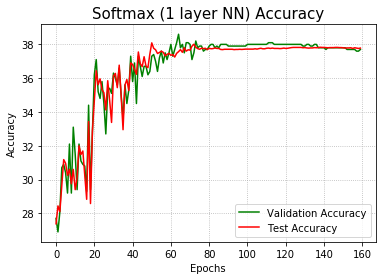

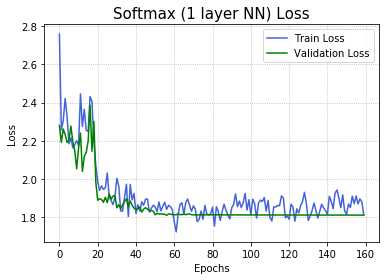

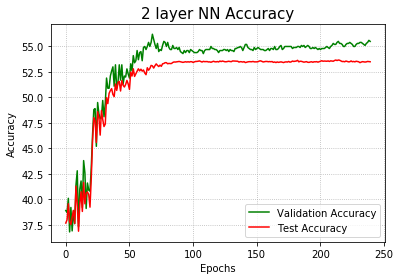

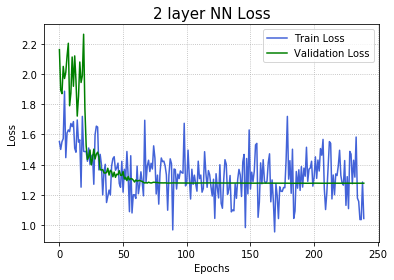

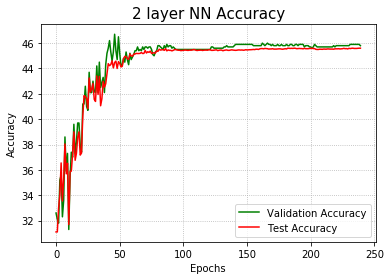

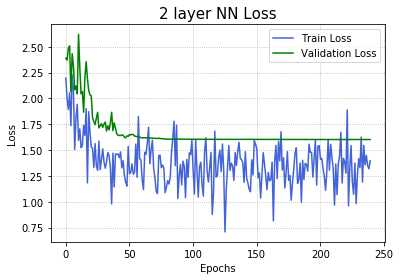

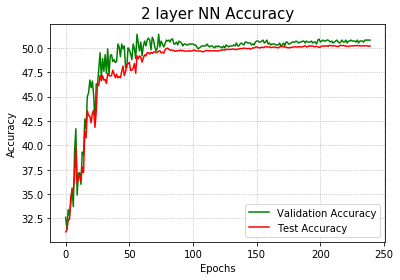

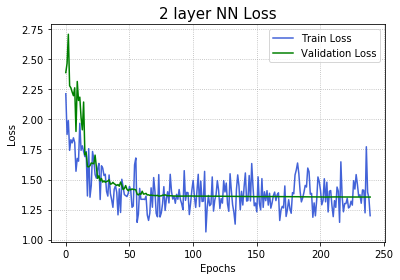

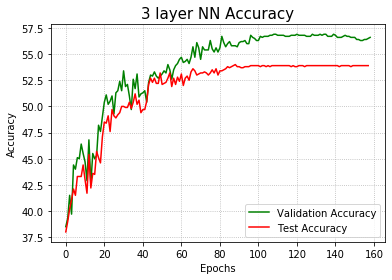

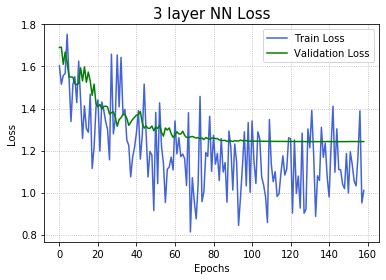

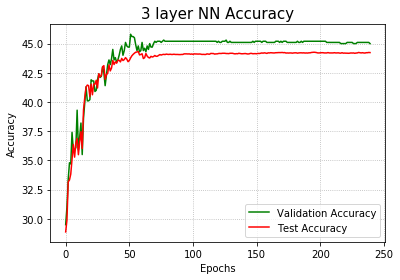

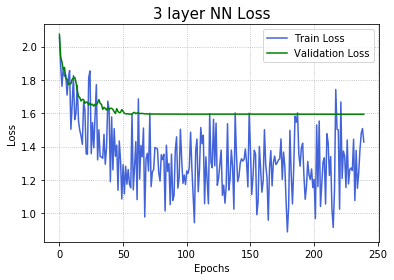

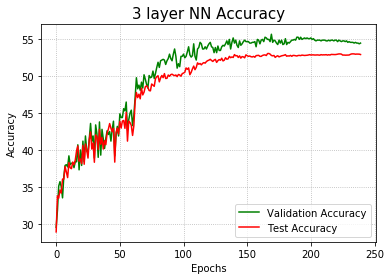

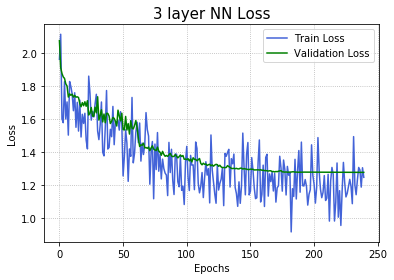

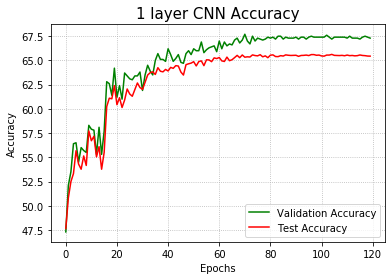

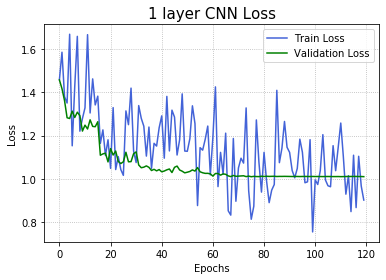

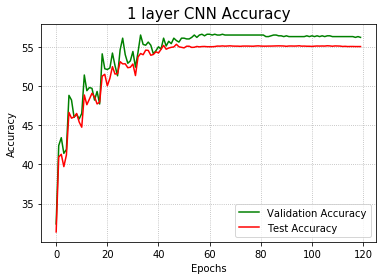

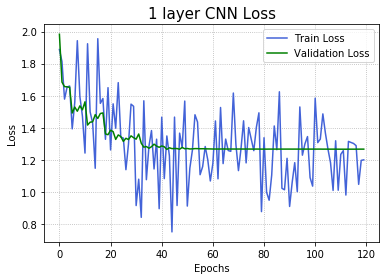

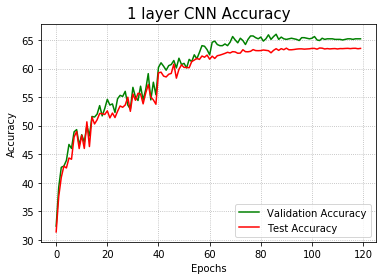

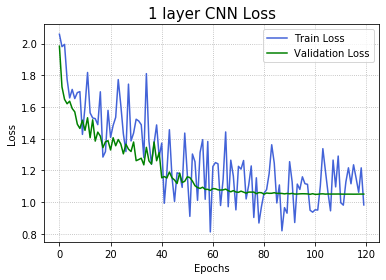

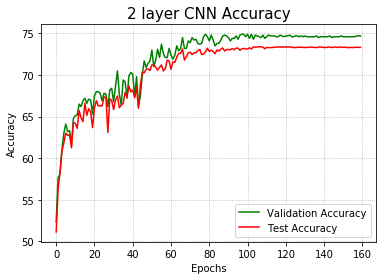

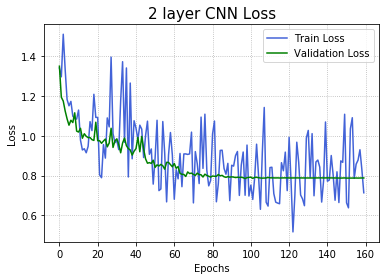

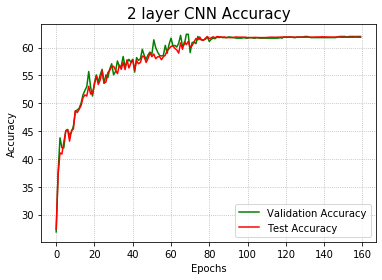

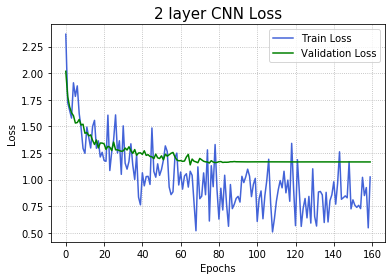

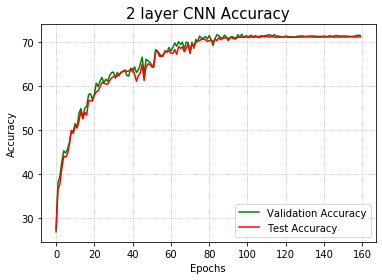

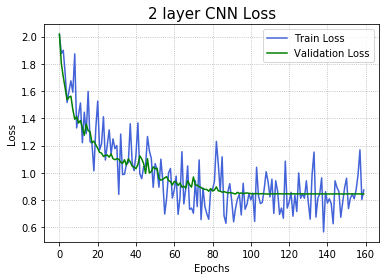

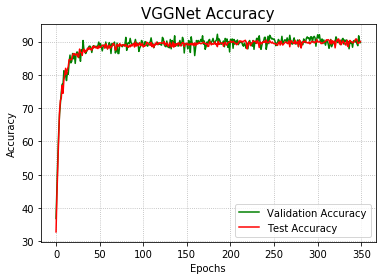

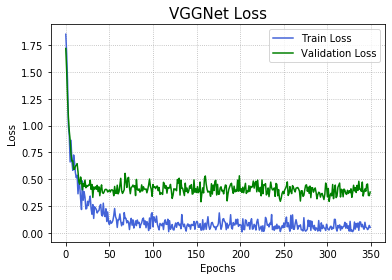

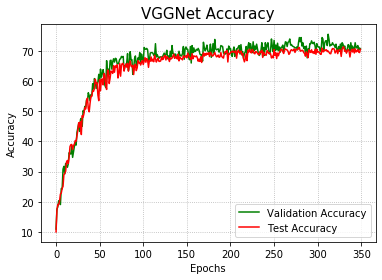

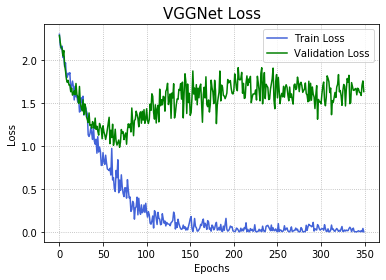

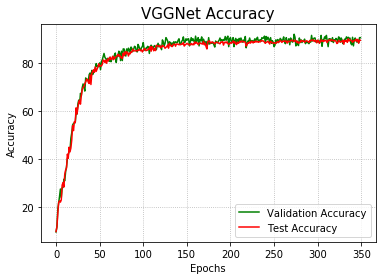

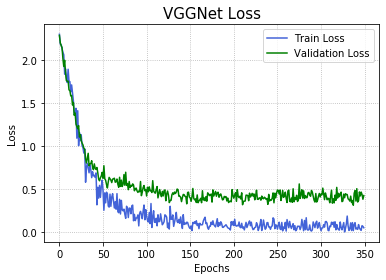

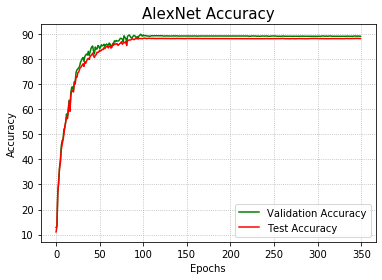

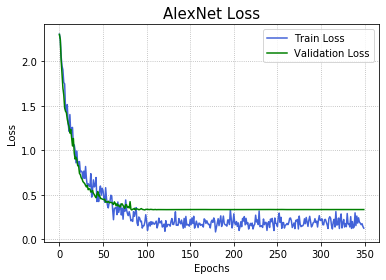

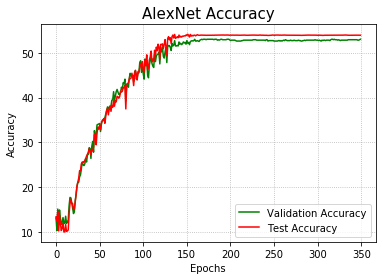

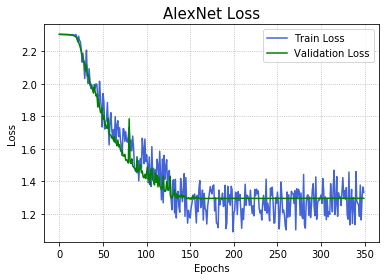

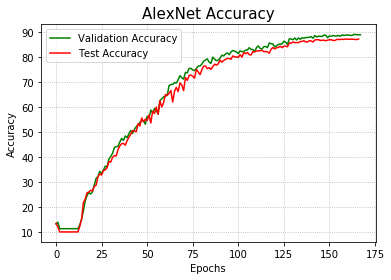

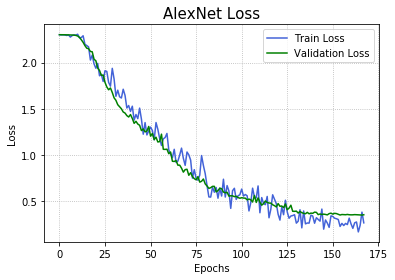

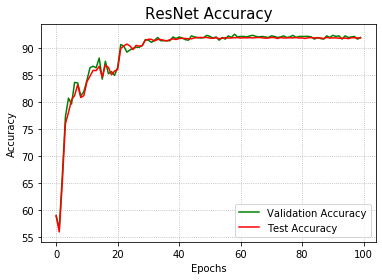

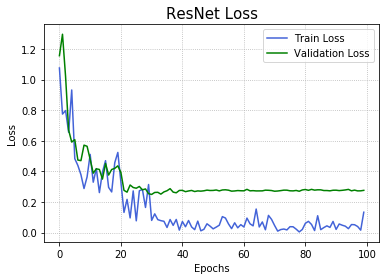

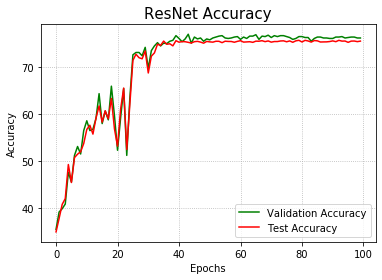

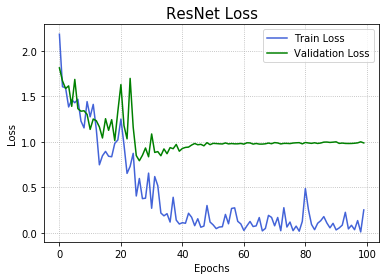

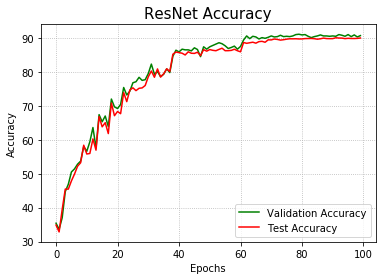

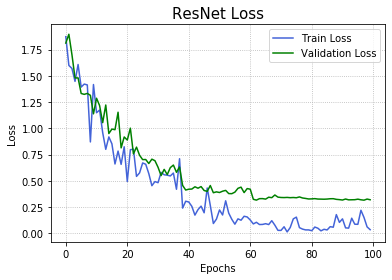

In [461]:
filedir = "../checkpoints"
models = ["softmax", "twolayernn", "threelayernn", "onelayercnn", "twolayercnn", "vggnet", "alexnet", "resnet"]
titles = ["Softmax (1 layer NN)", "2 layer NN", "3 layer NN", "1 layer CNN", "2 layer CNN", "VGGNet", "AlexNet", "ResNet"]
settings = ["49k", "4k", "ssl"]
for model, title in zip(models, titles):
    for setting in settings:
        exp_name = "%s-%s" %(model, setting)
        make_graph(filedir, exp_name, title)

In [469]:
def make_graph_compare_settings(filedir, model_name, title):
    settings = ["49k", "ssl", "4k"]
    data = {}
    for setting in settings:
        exp_name = model_name + "-" + setting
        filename = filedir + "/" + exp_name + "/" + exp_name + "_values.log"

        with open(filename, 'r') as f:
            data[setting] = json.load(f)
    
    colors = ["red", "green", "#4363d8"]
    
    plt.title(title + " Train Loss for different settings", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    for setting, color in zip(settings, colors):
        train_loss = np.array(data[setting]['train_loss_per_epoch'])[:, 1]
        plt.plot(train_loss, '-', linewidth=1.5, color=color)
    plt.legend(["49k", "SSL", "4k"])
    plt.grid(linestyle='dotted')
    print(model_name)
    plt.savefig("../visualizations/" + model_name + "_49k-ssl-4k" + "_train_loss.svg")
    plt.show()
    
    plt.clf()
    plt.title(title + " Val Loss for different settings", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    for setting, color in zip(settings, colors):
        val_loss = np.array(data[setting]['val_loss_per_epoch'])[:, 1]
        plt.plot(val_loss, '-', linewidth=1.5, color=color)
    plt.legend(["49k", "SSL", "4k"])
    plt.grid(linestyle='dotted')
    plt.savefig("../visualizations/" + model_name + "_49k-ssl-4k" + "_val_loss.svg")
    plt.show()
    
    plt.clf()
    plt.title(title + " Val Accuracy for different settings", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    for setting, color in zip(settings, colors):
        val_accuracy = np.array(data[setting]['val_accuracy_per_epoch'])[:, 1]
        plt.plot(val_accuracy, '-', linewidth=1.5, color=color)
    plt.legend(["49k", "SSL", "4k"])
    plt.grid(linestyle='dotted')
    plt.savefig("../visualizations/" + model_name + "_49k-ssl-4k" + "_val_accuracy.svg")
    plt.show()
    
    plt.clf()
    plt.title(title + " Test Accuracy for different settings", fontdict={'fontsize': 15})
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    for setting, color in zip(settings, colors):
        test_accuracy = np.array(data[setting]['test_accuracy'])[:, 1]
        plt.plot(test_accuracy, '-', linewidth=1.5, color=color)
    plt.legend(["49k", "SSL", "4k"])
    plt.grid(linestyle='dotted')
    plt.savefig("../visualizations/" + model_name + "_49k-ssl-4k" + "_test_accuracy.svg")
    plt.show()

alexnet


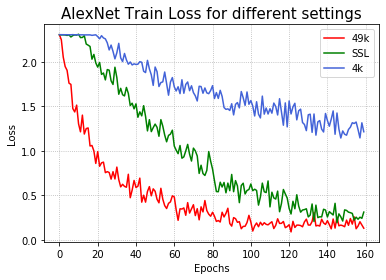

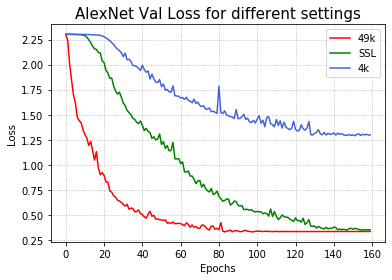

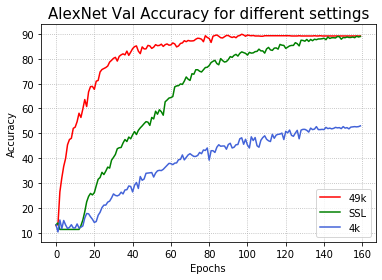

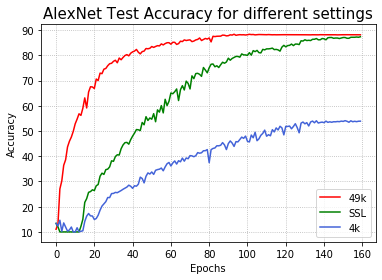

In [468]:
filedir = "../checkpoints"
models = ["alexnet"]
titles = ["AlexNet"]
for model, title in zip(models, titles):
    make_graph_compare_settings(filedir, model, title)

softmax


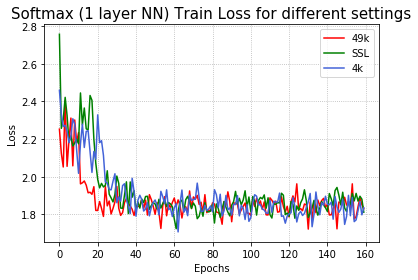

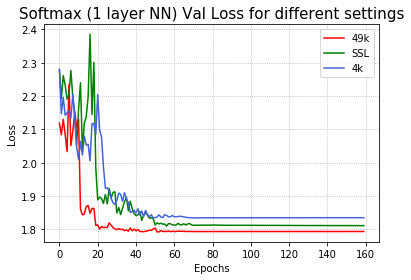

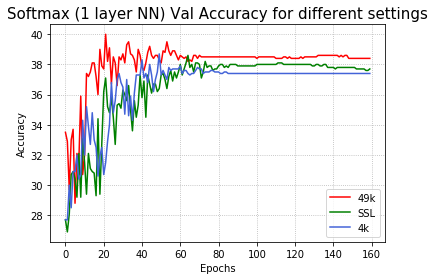

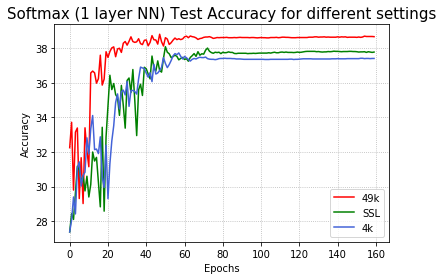

twolayernn


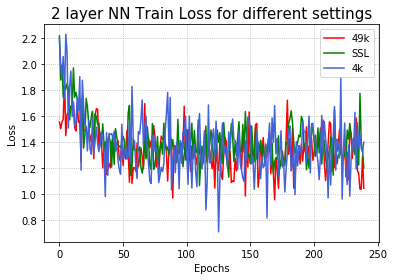

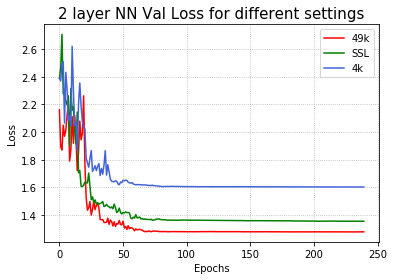

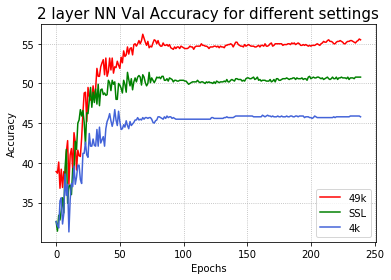

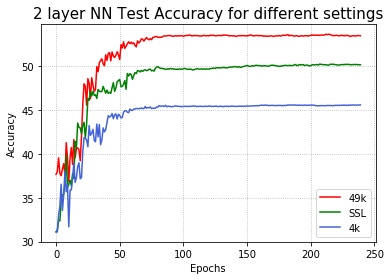

threelayernn


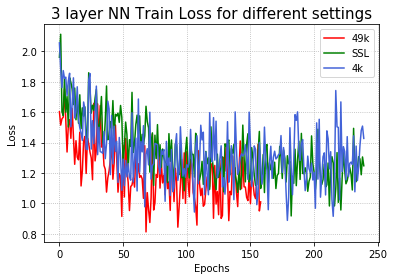

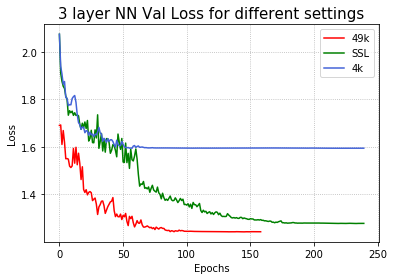

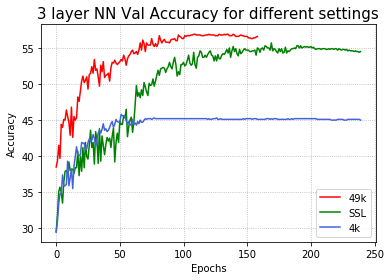

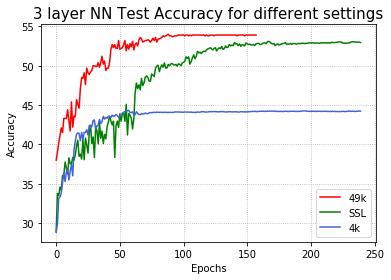

onelayercnn


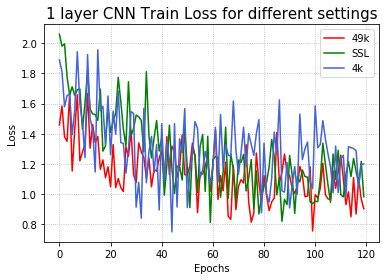

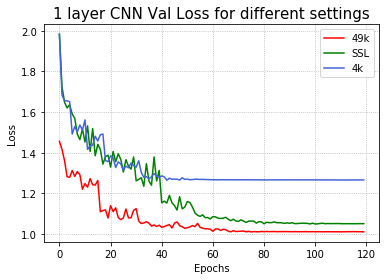

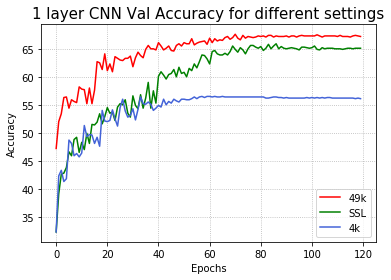

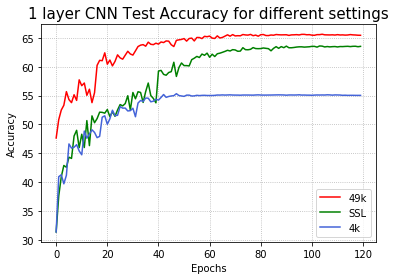

twolayercnn


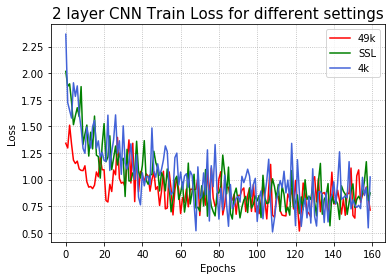

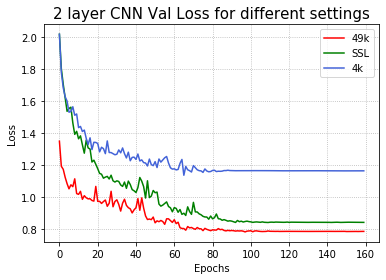

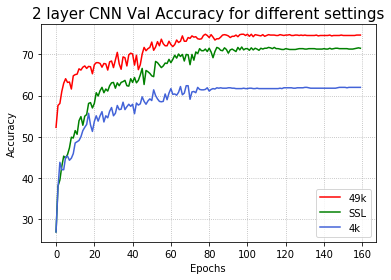

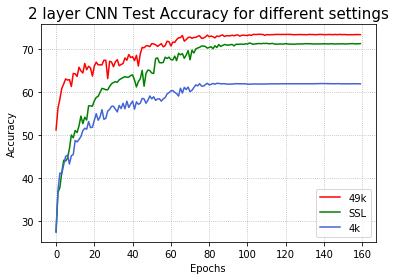

vggnet


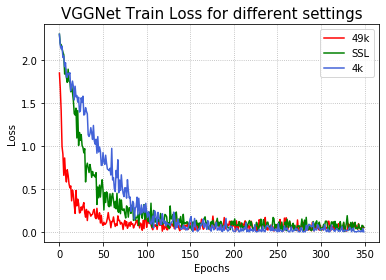

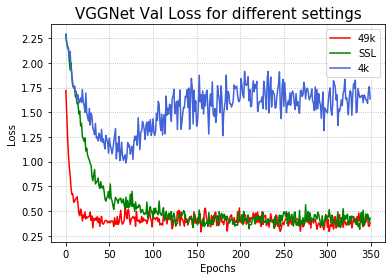

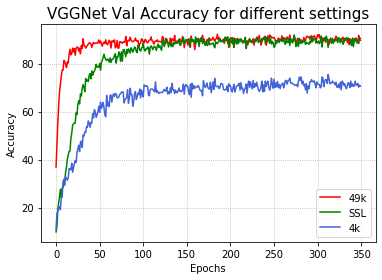

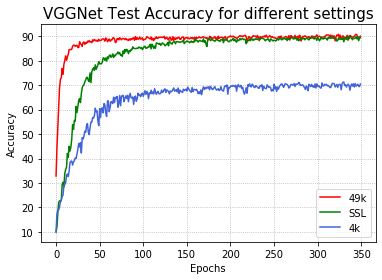

resnet


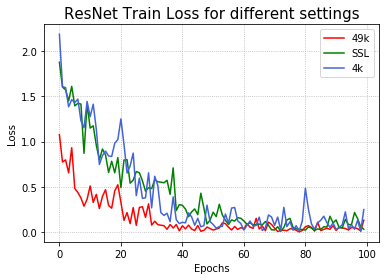

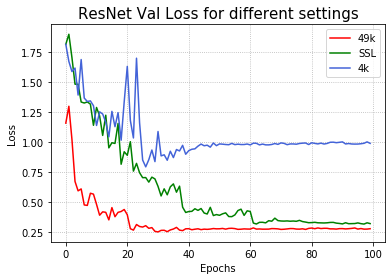

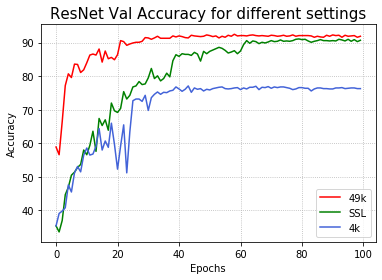

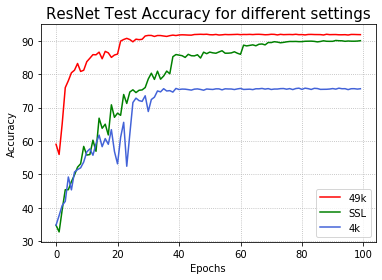

In [470]:
filedir = "../checkpoints"
models = ["softmax", "twolayernn", "threelayernn", "onelayercnn", "twolayercnn", "vggnet", "resnet"]
titles = ["Softmax (1 layer NN)", "2 layer NN", "3 layer NN", "1 layer CNN", "2 layer CNN", "VGGNet", "ResNet"]
for model, title in zip(models, titles):
    make_graph_compare_settings(filedir, model, title)

In [454]:
models = ["softmax", "twolayernn", "threelayernn", "onelayercnn", "twolayercnn", "alexnet", "vggnet",  "resnet"]
titles = ["Softmax (1 layer NN)", "2 layer NN", "3 layer NN", "1 layer CNN", "2 layer CNN", "AlexNet", "VGGNet", "ResNet"]
setting_titles = ["49k", "SSL", "4k"]

In [455]:
settings = ["49k", "ssl", "4k"]
acc = {}
for model_name in models:
    for setting in settings:
        exp_name = model_name + "-" + setting
        filename = filedir + "/" + exp_name + "/" + exp_name + "_values.log"

        with open(filename, 'r') as f:
            data = json.load(f)

        acc[exp_name] = data["best_test_accuracy"]


In [456]:
values_49k = []
values_4k = []
values_ssl = []
x_values = []
for model, title in zip(models, titles):
    key = "%s-%s" % (model, "49k")
    values_49k.append(acc[key])
    
    key = "%s-%s" % (model, "4k")
    values_4k.append(acc[key])
    
    key = "%s-%s" % (model, "ssl")
    values_ssl.append(acc[key])

In [457]:
labels = ["Softmax\n(1 layer NN)", "2 layer NN", "3 layer NN", "1 layer CNN", "2 layer CNN", "AlexNet", "VGGNet", "ResNet"]

In [458]:
values_49k

[38.80999755859375,
 53.66999816894531,
 54.0,
 65.6199951171875,
 73.40999603271484,
 88.4000015258789,
 90.80999755859375,
 91.91999816894531]

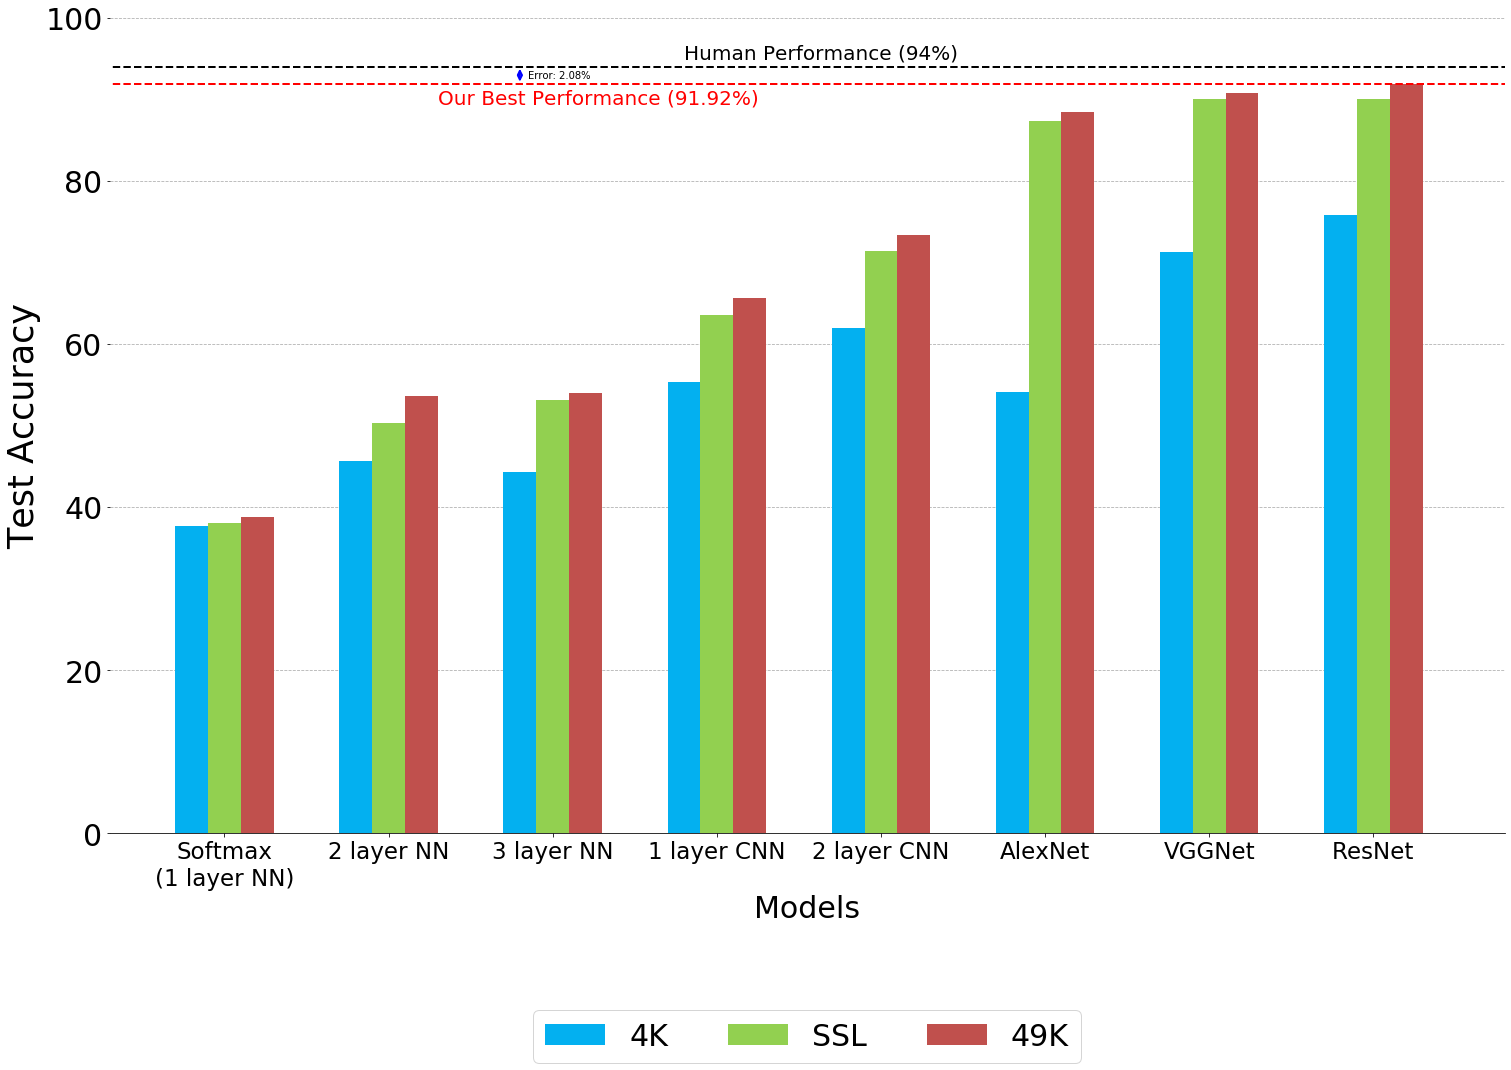

In [459]:
fig = plt.figure(figsize=(25, 15))
ylims = [0, 100]
xlims = [-0.5, len(labels)]

pos = np.arange(len(values_49k))
width = 0.2

ax = plt.axes()

barlist_1 = ax.bar(pos, np.array(values_4k), width=width, color='#03B0F0')
barlist_2 = ax.bar(pos+width, np.array(values_ssl), width=width, color='#92D050')
barlist_3 = ax.bar(pos+2*width, np.array(values_49k), width=width, color='#C0504D')

plt.ylim(ylims[0], ylims[1])
plt.xlim(xlims[0], xlims[1])

plt.yticks(fontsize=30)
locs, labels_1 = plt.xticks(ticks=pos+0.2, labels=labels, fontsize=23) 

x = [xlims[0]-0.5, xlims[1]+0.5]
y = [values_49k[-1] for i in x]
ax.plot(x, y, '--', linewidth=2, color="red")

text = "Our Best Performance (91.92%)"
text_x = 1.5
text_y = values_49k[-1] - 2.5
text_instance = plt.annotate(s=text, xy=(text_x, text_y), xytext=(text_x, text_y), size=20, color="red")


x = [xlims[0]-0.5, xlims[1]+0.5]
y = [94 for i in x]
ax.plot(x, y, '--', linewidth=2, color="black")

text = "Human Performance (94%)"
text_x = 3
text_y = 94 + 1
text_instance = plt.annotate(s=text, xy=(text_x, text_y), xytext=(text_x, text_y), size=20, color="black")

plt.annotate(s='', xy=(2,values_49k[-1]), xytext=(2,94), arrowprops=dict(arrowstyle='<->', color='blue', linewidth=2))

text = "Error: 2.08%"
text_x = 2.05
text_y = 92.55
text_instance = plt.annotate(s=text, xy=(text_x, text_y), xytext=(text_x, text_y), size=10, color="black")

plt.setp(labels_1, ha='center')

plt.ylabel("Test Accuracy", ha="center", fontsize=35)
plt.xlabel("Models", ha="center", fontsize=30)

# plt.title("Model Comparisons")
ax.legend((barlist_1, barlist_2, barlist_3), ("4K", "SSL", "49K"), loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol = 4, prop={'size': 30})


ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_axisbelow(True)

ax.grid(linestyle='dashed')
ax.get_xaxis().grid(False)

plt.savefig("../visualizations/all_models_comparison.svg", bbox_inches='tight')

## Generate values file from logfile

In [239]:
import re

In [429]:
filename="../checkpoints/threelayernn-2.log"

In [430]:
with open(filename, 'r') as f:
    data = f.read()
data = data.split("\n")

In [431]:
filters = ["Train Epoch:", "Test set Epoch:"]

In [432]:
filtered_data = []
for line in data:
    add=False
    for filter in filters:
        if filter in line:
            add=True
    if add:
        filtered_data.append(line)

In [433]:
train_loss = {}
val_loss = {}
val_acc = {}
test_loss = {}
test_acc = {}

In [434]:
for i, line in enumerate(filtered_data):
    if filters[0] in line:
        splits = re.split('\t', line)
        epoch = int(splits[0].split()[2])
        train_loss_item = float(splits[1].split()[2])
        val_loss_item = float(splits[2].split()[2])
        val_acc_item = float(splits[3].split()[2])
        train_loss[epoch] = train_loss_item
        val_loss[epoch] = val_loss_item
        val_acc[epoch] = val_acc_item
    elif filters[1] in line:
        splits = re.split(' |,|\(|\)|\%', line)
        splits = [s for s in splits if s!=""]
        epoch = int(splits[3])
        test_loss_item = float(splits[7])
        test_acc_item = float(splits[10])
        test_loss[epoch] = test_loss_item
        test_acc[epoch] = test_acc_item
    else:
        print("Error")

In [435]:
best_epoch =  0
best_test_accuracy = 0
for k,v in test_acc.items():
    if v >= best_test_accuracy:
        best_epoch = k
        best_test_accuracy = v

In [436]:
best_test_accuracy

54.0

In [437]:
train_loss1 = []
for k,v in train_loss.items():
    train_loss1.append([k, v])
val_loss1 = []
for k,v in val_loss.items():
    val_loss1.append([k, v])
val_acc1 = []
for k,v in val_acc.items():
    val_acc1.append([k, v])
test_loss1 = []
for k,v in test_loss.items():
    test_loss1.append([k, v])
test_acc1 = []
for k,v in test_acc.items():
    test_acc1.append([k, v])

In [438]:
logger = {"train_loss_per_epoch": train_loss1,
          "val_loss_per_epoch": val_loss1,
          "val_accuracy_per_epoch": val_acc1,
          "test_loss": test_loss1,
          "test_accuracy": test_acc1,
          "best_epoch": best_epoch,
          "best_test_accuracy": best_test_accuracy}

In [439]:
filename = "../checkpoints/threelayernn-49k/threelayernn-49k_values.log"
with open(filename, 'w') as outfile:
    json.dump(logger, outfile, sort_keys=True, indent=4, separators=(',', ': '))